In [26]:
import numpy as np
import pandas as pd
import pickle

In [27]:
# train data 불러오기
train_data = pd.read_pickle('./train_data.pkl')

In [28]:
train_data.head(6)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,2,73,20071228.0,175.0,5,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,2
1,3,1,9,32,19970401.0,410.0,3,-9.990000e+02,-9.990000e+02,-9.990000e+02,...,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,801.0,813.0,2
2,4,1,8,89,20161228.0,468.0,5,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,2
3,7,1,10,141,20000814.0,353.0,3,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,2
4,9,1,9,32,20050901.0,196.0,3,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,2
5,11,1,9,155,20020501.0,243.0,3,3.358054e+10,9.222997e+09,2.372791e+10,...,0.000000e+00,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,2


In [29]:
X_train = train_data.drop("OC",axis=1)
y_train = train_data["OC"]

In [30]:
# test data 불러오기 및 split
test_data = pd.read_pickle('./test_data.pkl')
X_test = test_data.drop("OC",axis=1)
y_test = test_data["OC"]

In [31]:
# 피처 스케일링
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test) #왜 여기서 transform 만 했을까?

C:\Users\john\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\john\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\john\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


모델 만들기

In [32]:
# 로지스틱 선형 회귀
# 타깃 변수가 0과 1로만 구성되어 있으므로 선형회귀보다 로지스틱이 적합

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=12, solver='liblinear', multi_class='ovr')
lr_model.fit(X_train,y_train)
lr_model.score(X_test, y_test)

0.13385826771653545

In [34]:
# kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.015748031496062992

In [123]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(100*(1-(y_test != y_pred).sum()/X_test.shape[0]))

37.79527559055118


In [145]:
# 정확도 높은 모델로 파일 저장
answer = pd.read_csv('submission_sample.csv')

for i in range(len(y_pred)):
    answer.iloc[i, 1] = y_pred[i]

answer.to_csv('answer.csv', index=False)

In [38]:
# Decision Tree
from sklearn import tree
from sklearn.metrics import accuracy_score

d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
d_tree.fit(X_train, y_train)

y_pred_tr = d_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.09


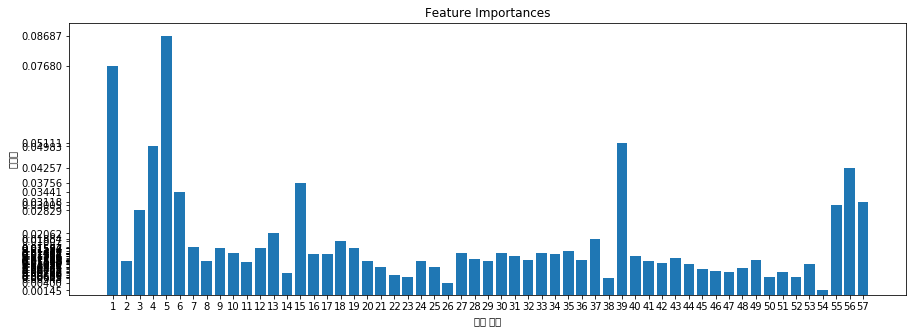

In [82]:
# Random Forest를 사용하여 Feature Importance 
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

rf_clf = RandomForestClassifier(n_estimators=500,  random_state=42)
rf_clf.fit(X_train, y_train)

features = train_data.columns
importances = rf_clf.feature_importances_

y = importances
x = np.arange(len(y))
plt.rcParams['figure.figsize'] = [15,5]
xlabel = [i for i in range(1,len(features))]
plt.title('Feature Importances')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("변수 순서")
plt.ylabel("중요도")
plt.show()

In [83]:
idx = [0, 4, 5, 15, 39, 56]
for i in idx:
    print(train_data.columns[i])

inst_id
openDate
bedCount
profit1
profit2
employee2


In [84]:
from sklearn import metrics

# Random Forest
y_pred_rf = rf_clf.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred_rf))

정확도 : 0.031496062992125984


In [89]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), #stump
                          n_estimators=500, 
                          learning_rate=0.1)
model = eclf.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.031496062992125984


In [90]:
# XGBoost
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1000, max_depth=2, learning_rate=0.5, nthread=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.047244094488188976

In [91]:
# LightGBM
from lightgbm.sklearn import LGBMClassifier

model = LGBMClassifier(max_depth=2, learning_rate=0.5, n_estimators=50, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.03937007874015748

In [117]:
# Stacking
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

estimator1 = XGBClassifier(max_depth=3, learning_rate=0.5, n_estimators=50, n_jobs=-1)
estimator2 = LGBMClassifier(max_depth=2, learning_rate=0.5, n_estimators=50, n_jobs=-1)
estimator3 = RandomForestClassifier(n_estimators=500, max_depth=3, n_jobs=-1)
estimator4 = MLPClassifier(hidden_layer_sizes=(512,256, 32))

base_estimators = [estimator1, estimator2, estimator3, estimator4]

for estimator in base_estimators:
    estimator.fit(X_train, y_train)

In [118]:
meta_train_set = np.array([estimator.predict(X_test) for estimator in base_estimators]).T 
for estimator in base_estimators:
    result = cross_val_score(estimator, meta_train_set, y_test, scoring="accuracy" , cv=5).mean()
    print(result)

1.0
1.0
1.0
1.0


In [119]:
meta_train_set2 = np.array([estimator.predict_proba(X_test)[:,1] for estimator in base_estimators]).T 
for estimator in base_estimators:
    result = cross_val_score(estimator, meta_train_set2, y_test, scoring="accuracy" , cv=5).mean()
    print(result)

1.0
1.0
1.0
1.0


In [122]:
new_X_test = np.concatenate([X_test, meta_train_set2], axis = 1)
for estimator in base_estimators:
    result = cross_val_score(estimator, new_X_test, y_test, scoring="accuracy" , cv=5).mean()
    print(result)

1.0
1.0
1.0
1.0


### 참고
- https://www.datacamp.com/community/tutorials/adaboost-classifier-python